# **HACKATHON NOTEBOOK**

**IMPORTING NECESSARY LIBRARIES**

In [1]:
#importing needed libraries
import numpy as np
import pandas as pd
import statistics
from scipy import stats
import matplotlib.pyplot as plt

**LOADING DATAFRAME**

In [2]:
#Reading training file into df variable using pandas
df = pd.read_csv("/kaggle/input/practice-hackathon/Train.csv")
df.head()

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


**PRE-PROCESSING DATA**

In [3]:
#Encoding characters in column A to numbers
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['A']= label_encoder.fit_transform(df['A'])
#Printing unique-values in column after encoding
df['A'].unique()

array([0, 2, 1])

In [4]:
#Feature-Target Split
X = df.drop(['Target'], axis=1)
y = df['Target']

In [5]:
#Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**ANALYSIS OF DATA**

In [6]:
#Getting better idea of the data
df.describe()

,A,B,C,D,E,F,G,H,Target
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,1.050447,0.525750,0.409254,0.140070,0.834224,0.362219,0.181684,0.240351,9.964879
std,0.825192,0.119131,0.098557,0.042661,0.491449,0.223000,0.109317,0.139567,3.229146
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.444000,0.187000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.145000,0.804500,0.339500,0.171750,0.235000,10.000000
75%,2.000000,0.615000,0.480000,0.165000,1.156750,0.506500,0.255000,0.330000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


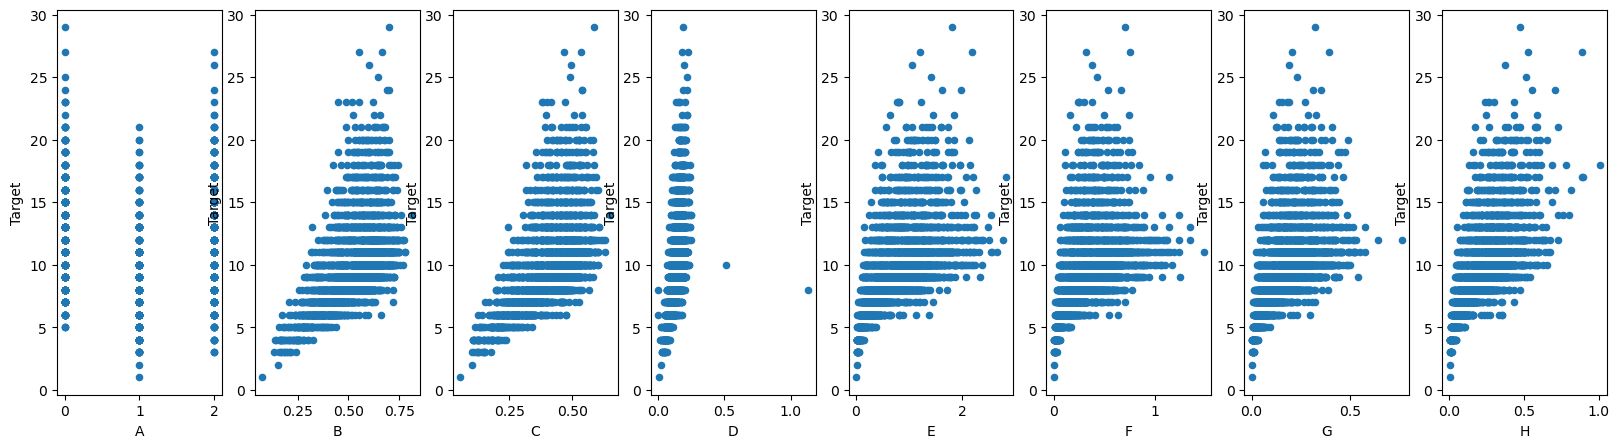

In [7]:
#plotting target vs feature for different features to get an idea of the data-frame
fig, ax = plt.subplots(1, 8, figsize=(20,5))
for i,col in enumerate(df.columns[:8]):
     df.plot(kind='scatter', x=col, y='Target', ax=ax[i])
plt.show()

**TRAINING DATA ON DIFFERENT MODELS**

In [8]:
#Creating polynomial feature of training set features for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
X_train_trf = polynomial_features.fit_transform(X_train)
X_test_trf = polynomial_features.fit_transform(X_test)

In [9]:
#Training Quadratic Regression on training set
from sklearn.linear_model import LinearRegression, Lasso
linear=LinearRegression()
linear.fit(X_train_trf, y_train)
y_predlinear = linear.predict(X_test_trf)

#Finding MSE of prediction with training target
err = mean_squared_error(y_predlinear, y_test)
err

4.870032807860676

In [10]:
#Tuning Hyper-parameter using GridSearchCV to find optimal alpha value for Lasso Regression
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train_trf,y_train)

#Printing optimal alpha
print(lasso_regressor.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.316e+03, tolerance: 2.103e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.212e+03, tolerance: 2.051e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.286e+03, tolerance: 2.035e

{'alpha': 0.001}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.611e+03, tolerance: 2.555e+00
  model = cd_fast.enet_coordinate_descent(


In [11]:
#Training Model using Lasso regression with optimal hyper-parameter found above.
lasso=Lasso(alpha=0.001)
lasso.fit(X_train_trf, y_train)
y_predlasso = lasso.predict(X_test_trf)

#Finding MSE of prediction with training target
err = mean_squared_error(y_predlasso, y_test)
err

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.611e+03, tolerance: 2.555e+00
  model = cd_fast.enet_coordinate_descent(


4.790972742103316

In [12]:
##Lets try SVR to see if we get lower MSE on the available data points
# Defining Parameters for hyper-tuning
from sklearn.svm import SVR
C_arr = [0.1,1,10,100,1000]
eps_arr = [1,0.1,0.01,0.001,0.0001,0.00001]

##Hyper-tuning the parameters
param_arr = []
param_cols =  ['c','epsilon','correlation']
for C in C_arr:
    for epsilon in eps_arr:
        model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        corr = stats.pearsonr(y_test,y_pred)[0]
        param_arr.append([C,epsilon,corr])

#Making and printing correlation vs hyper parameters in descending order
param_df = pd.DataFrame(param_arr,columns= param_cols)
param_df = param_df.sort_values(by=['correlation'], ascending=False)
param_df.head(3)

,c,epsilon,correlation
18,100.0,1.0000,0.767939
12,10.0,1.0000,0.767479
16,10.0,0.0001,0.767213


In [13]:
#Training SVR based on highest correlation parameters

model_svr = SVR(kernel='rbf', C=param_df.iloc[0,0], epsilon=param_df.iloc[0,1])
svr = model_svr.fit(X_train, y_train)
y_predsvr = model_svr.predict(X_test)

#Finding MSE of prediction with training target
err = mean_squared_error(y_predsvr, y_test)
err

4.733898622574315

**GENERATING TEST DATA TARGET VALUES**

In [14]:
#Reading test data to generate test target
test_df = pd.read_csv("/kaggle/input/practice-hackathon/Test.csv")

In [15]:
#encoding first column of data as before
test_df['A']= label_encoder.fit_transform(test_df['A'])

In [16]:
#Saving Index column from the data frame for future use and dropping it now in place in the df
Index=test_df['Index']
test_df.drop(['Index'],axis=1,inplace=True)

In [17]:
#Transforming test df for polynomial regression
test_df_trf = polynomial_features.fit_transform(test_df)

In [18]:
#Generating predictions of different models
y_test_predlinear = linear.predict(test_df_trf)
y_test_predlasso = lasso.predict(test_df_trf)
y_test_predsvr = svr.predict(test_df)

In [19]:
#Creating dataframe for the desired model's test set predicition
result = pd.DataFrame(Index, columns = ['Index'])
result['Target']= y_test_predlasso

In [20]:
#Created dataframe
result.head()

,Index,Target
0,866,12.103331
1,1483,10.098904
2,599,14.907267
3,1702,11.849760
4,670,11.678162


**GENERATING TEST DATA TARGET DATAFRAME CSV FILE**

In [21]:
#Exporting test predicition df to a csv file
result.to_csv("submission_lasso.csv", index=False)